In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from tqdm import tqdm

## Taylor Series

The Taylor series is an infinite sum of terms that represents a function as a series of its derivatives at a single point. It is named after the mathematician Brook Taylor. The series is particularly useful for approximating functions that are difficult to compute directly.

### Definition

Given a function $f(x)$ that is infinitely differentiable at a point $a$, the Taylor series of $f(x)$ around the point $a$ is given by:

$$
f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots
$$

In general, the $n$-th term of the Taylor series is:

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n
$$

where:
- $f^{(n)}(a)$ is the $n$-th derivative of $f(x)$ evaluated at $a$
- $n!$ is the factorial of $n$
- $(x-a)^n$ is the $n$-th power of $(x-a)$

### Maclaurin Series

A special case of the Taylor series is the Maclaurin series, where $a = 0$. The Maclaurin series of $f(x)$ is:

$$
f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + \cdots
$$

Or more generally:

$$
f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^n
$$

### Examples

1. **Exponential Function** $e^x$:

$$
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
$$

2. **Sine Function** $\sin(x)$:

$$
\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots
$$

3. **Cosine Function** $\cos(x)$:

$$
\cos(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{2n} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots
$$

### Convergence

The Taylor series may not always converge to the function it represents. The series converges to $f(x)$ if the remainder term $R_n(x)$ approaches zero as $n$ approaches infinity. The remainder term is given by:

$$
R_n(x) = \frac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{n+1}
$$

for some $c$ between $a$ and $x$. If the remainder term goes to zero, the Taylor series converges to the function $f(x)$.


In [2]:
def exp_taylor_series(X: float, N: int, A: float) -> float:
    n = np.array(range(N+1))
    a = (X - A)**n

    factorials = []
    for number in n:
        factorials.append(math.factorial(number))
    factorials_array = np.array(factorials)

    a = a / factorials_array

    deriv = np.empty(N+1)
    deriv.fill(np.exp(A))
    return np.dot(a, deriv)

In [3]:
def cos_taylor_series(X: float, N: int, A: float) -> float:
    result = 0
    for n in range(N + 1):
        if n % 4 == 0:
            result += (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 1:
            result -= (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 2:
            result -= (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 3:
            result += (math.sin(A) * (X - A)**n) / math.factorial(n)
    return result

def sin_taylor_series(X: float, N: int, A: float) -> float:
    result = 0
    for n in range(N + 1):
        if n % 4 == 0:
            result += (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 1:
            result += (math.cos(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 2:
            result -= (math.sin(A) * (X - A)**n) / math.factorial(n)
        elif n % 4 == 3:
            result -= (math.cos(A) * (X - A)**n) / math.factorial(n)
    return result

In [4]:
class taylor_series:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        
    def set_params(self, N = 5, A = 0):
        self.params["N"] = N
        self.params["A"] = A
        return
    
    def set_graph_params(self, size = 5000, lower_bound = -10, upper_bound = 10):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def plot_function(self, func="exponential"):
        assert func in ["exponential", "cosine", "sine"]
        
        if func == "exponential":
            taylor=exp_taylor_series
            function = np.exp
        elif func == "cosine":
            taylor = cos_taylor_series
            function = np.cos
        elif func == "sine":
            taylor = sin_taylor_series
            function = np.sin
            
        if not self.graph_params:
            self.set_graph_params()
        
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        if self.xs is None:
            self.xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size))
            
        y = function(self.xs)
        
        taylor_ys = [taylor(x, **self.params) for x in self.xs]
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.xs, y, label='Function', marker='o')
        plt.plot(self.xs, taylor_ys, label='Taylor Approximation', marker='o', color='red')
        plt.title("Plot of the Function and its Taylor Series Approximation")
        plt.xlim(lower_bound *1.1, upper_bound *  1.1)
        plt.ylim(np.min(y) - abs(0.1 *np.max(y)), np.max(y) * 1.1)
        plt.text(x = lower_bound, y = np.max(y)*2/3, s = f"Order = {self.params['N']}")
        plt.text(x = lower_bound, y = np.max(y)*3/4, s = f"Function = {func}")
        plt.legend()
        plt.show()
        
    def visualize_plots(self, N=10, A = 0, func = "exponential"):
        for i in range(N+1):
            self.set_params(N=i, A = A)
            self.plot_function(func = func)
            display(plt.gcf())
            plt.close()
            time.sleep(0.5)
            clear_output(wait=True) 


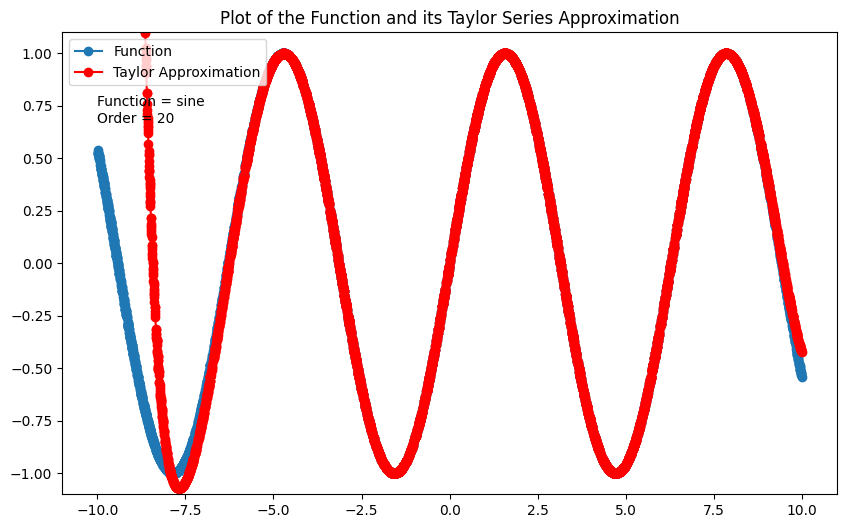

<Figure size 640x480 with 0 Axes>

In [5]:
TaylorSeries = taylor_series()
TaylorSeries.visualize_plots(N = 20, A = 2, func = "sine")

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
def create_polynomials(xs, N = 10):
    xs = xs.reshape(len(xs), 1)
    xs_copy = xs.copy()
    for n in range(2, N + 1):
        xs = np.concatenate([xs, xs_copy**n/math.factorial(n)], axis = 1)
    return xs

In [8]:
def crazy_func(xs):
    return np.sqrt(np.exp(xs/10) * np.cos(xs) + 4)

In [21]:
class LinearApprox:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        self.coefs = None
    
        
    def set_graph_params(self, size = 100000, lower_bound = -10, upper_bound = 10):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def plot_function(self, N =5, func="exponential"):    
        if func == "exponential":
            function = np.exp
        elif func == "cosine":
            function = np.cos
        elif func == "sine":
            function = np.sin
        else:
            function = func
            
        if not self.graph_params:
            self.set_graph_params()
        
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        if self.xs is None:
            self.xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size))
            
        y = function(self.xs)
        
        poly_xs= create_polynomials(self.xs, N= N)
        
        model = LinearRegression()
        model.fit(poly_xs, y)
        self.coefs = model.coef_
        predictions = model.predict(poly_xs)
        
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.xs, y, label='Function', marker='o')
        plt.plot(self.xs, predictions, label='Taylor Approximation', marker='o', color='red')
        plt.title("Plot of the Function and its Taylor Series Approximation")
        plt.xlim(lower_bound *1.1, upper_bound *  1.1)
        plt.ylim(np.min(y) - abs(0.1 *np.max(y)), np.max(y) * 1.1)
        plt.text(x = lower_bound, y = np.min(y)+0.2*(np.max(y)-np.min(y)), s = f"Order = {N}")
        if func is str:
            plt.text(x = lower_bound, y = np.min(y)+0.4*(np.max(y)-np.min(y)), s = f"Function = Custom Function")
        else:
            plt.text(x = lower_bound, y = np.min(y)+0.4*(np.max(y)-np.min(y)), s = f"Function = {func}")
        plt.legend()
        plt.show()
        
        self.ys = predictions
        
    def visualize_plots(self, N=10, A = 0, func = "exponential"):
        for i in range(N+1):
            self.plot_function(func = func, N = i)
            display(plt.gcf())
            plt.close()
            time.sleep(0.5)
            clear_output(wait=True) 


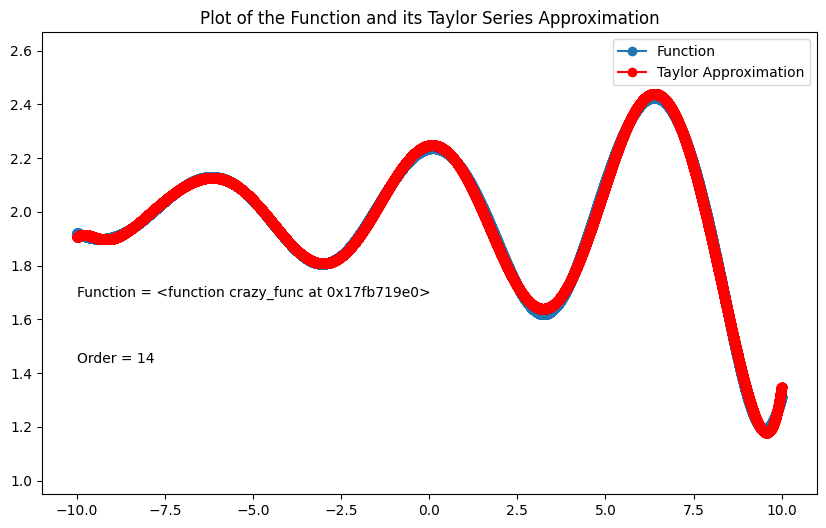

<Figure size 640x480 with 0 Axes>

In [24]:
linear_approx = LinearApprox()
linear_approx.visualize_plots(N= 14, func = "cosine")

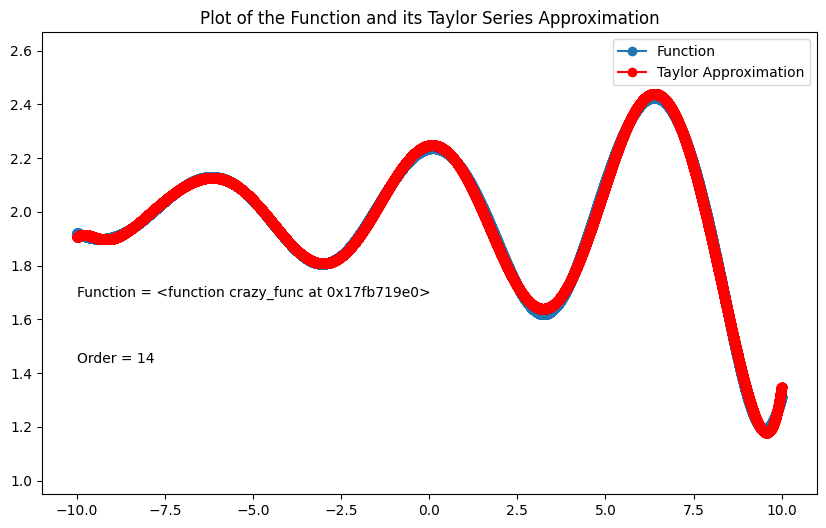

<Figure size 640x480 with 0 Axes>

In [25]:
linear_approx.visualize_plots(N= 14, func = crazy_func)

In [ ]:
[round(i, 4) for i in LinearApprox.coefs]

[0.0,
 -1.0,
 -0.0,
 1.0,
 0.0,
 -0.9999,
 -0.0,
 0.9994,
 0.0,
 -0.9972,
 -0.0,
 0.9885,
 0.0,
 -0.9579,
 -0.0,
 0.8669,
 0.0,
 -0.6535,
 -0.0,
 0.3026]

## Neural Network

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
def relu(x):
    return np.maximum(0, x)

def cost(ypred, y):
    m = len(y)
    return(np.sum((ypred - y)**2) / m)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [32]:
class FCNN:
    def __init__(self, layer_dims) -> None:
        self.params = {}
        self.params["layers"] = len(layer_dims) - 1
        for l in range(1,len(layer_dims)):
            self.params["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
            self.params["b" + str(l)] = np.zeros((layer_dims[l],1))
        self.cache = None
        
    def forward(self, X):
        cache = {}
        
        layers = self.params["layers"]
        A = X.T
        
        for l in range(1, layers + 1):
            Wl = self.params["W" + str(l)]
            bl = self.params["b" + str(l)]
            
            Zl = np.dot(Wl, A) + bl
            if l == layers:
                Al = Zl
            else:
                Al = relu(Zl)
            
            cache["Z" + str(l)] = Zl
            cache["A" + str(l)] = Al
            A = Al
        
        self.cache = cache
        return Al, cache
        
    def backward(self, y, xs):
        layers = self.params["layers"]
        grads = {}
        
        Al = self.cache["A" + str(layers)]  # (1 x 1000)
        dAl = -2 * (y - Al)
        dZl = dAl 
        
        grads["dW" + str(layers)] = np.dot(dZl, self.cache["A" + str(layers - 1)].T) / y.shape[0] # (1, 10)
        grads["db" + str(layers)] = np.mean(dZl, axis=1, keepdims=True)
        
        for l in range(layers - 1, 0, -1):
            dAl = np.dot(self.params["W" + str(l + 1)].T, dZl)
            dZl = dAl * relu_derivative(self.cache["Z" + str(l)])
            
            grads["dW" + str(l)] = np.dot(dZl, self.cache["A" + str(l - 1)].T if l != 1 else xs) / y.shape[0]
            grads["db" + str(l)] = np.mean(dZl, axis=1, keepdims=True)
        
        self.grads = grads


    def teach_weights(self, lr, beta=0.9):
        layers = self.params["layers"]
        for l in range(1, layers + 1):
            if "Vdw" + str(l) not in self.params:
                self.params["Vdw" + str(l)] = np.zeros_like(self.params["W" + str(l)])
                self.params["Vdb" + str(l)] = np.zeros_like(self.params["b" + str(l)])
            
            # Update momentum
            self.params["Vdw" + str(l)] = beta * self.params["Vdw" + str(l)] + (1 - beta) * self.grads["dW" + str(l)]
            self.params["Vdb" + str(l)] = beta * self.params["Vdb" + str(l)] + (1 - beta) * self.grads["db" + str(l)]
            
            # Update weights and biases
            self.params["W" + str(l)] -= lr * self.params["Vdw" + str(l)]
            self.params["b" + str(l)] -= lr * self.params["Vdb" + str(l)]

In [66]:
class FCNN_approx:
    def __init__(self) -> None:
        self.graph_params = {}
        self.params = {}
        self.xs = None
        self.ys = None
        self.model = None
        
    def set_params(self, N=5, A=0):
        self.params["N"] = N
        self.params["A"] = A
        return
    
    def set_graph_params(self, size=5000, lower_bound=-10, upper_bound=10):
        self.graph_params = {
            "size": size,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound
        }
    
    def generate_data(self, func="exponential"):
        if func == "exponential":
            function = np.exp
        elif func == "cosine":
            function = np.cos
        elif func == "sine":
            function = np.sin
        else:
            function = func
            
        size = self.graph_params["size"]
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]
        
        xs = np.sort(np.random.uniform(low=lower_bound, high=upper_bound, size=size)) 
        self.xs = create_polynomials(xs, N=self.params["N"])
        self.ys = function(xs)
        
    def initialize(self, N, func):
        self.set_params(N=N)
        self.set_graph_params()
        self.generate_data(func=func)
        
    def train(self, layer_dims, initial_lr, epochs=10, decay_rate=0.8, decay_steps=10, standardize=True, visualize=True):
        assert layer_dims[0] == self.params["N"], f'First dimension must have {self.params["N"]} inputs'
        assert layer_dims[-1] == 1, f'Last dimension must have output 1'
        
        if standardize:
            scaler = StandardScaler()
            xs = scaler.fit_transform(self.xs)
        else:
            xs = self.xs
        
        if self.model is None:
            self.model = FCNN(layer_dims=layer_dims)
        
        progress_bar = range(1, epochs + 1)
        for e in progress_bar:
            Al, cache = self.model.forward(xs)

            current_cost = cost(self.ys, Al)
            #progress_bar.set_postfix({'train_loss': f'{current_cost:.4f}'})
            if e % 10 == 0:
                if visualize:
                    clear_output(wait=True)
                    
                    self.plot_function(y_pred=Al, epoch = e, loss = round(current_cost,4))
                    display(plt.gcf())
                    time.sleep(0.01) 
        
            self.model.backward(self.ys, self.xs)
            lr = initial_lr * (decay_rate ** (e / decay_steps))
            params = self.model.teach_weights(lr=lr) 

            
        return Al, params
    
    def plot_function(self, y_pred, **kwargs):
        lower_bound = self.graph_params["lower_bound"]
        upper_bound = self.graph_params["upper_bound"]

        title_parts = [f"{key.capitalize()} : {value}" for key, value in kwargs.items()]
        title = "NN approximation \n" + " | ".join(title_parts) if title_parts else "NN approximation"
        
        plt.plot(self.xs[:,0], y_pred, label='Predicted', alpha=0.6)
        plt.plot(self.xs[:,0], self.ys, label='True', alpha=0.6)

        #plt.scatter(self.xs[:,0], y_pred, label='Predicted', alpha=0.6)
        #plt.scatter(self.xs[:,0], self.ys, label='True', alpha=0.6)
        
        plt.title(title)
        
        plt.xlim(lower_bound * 1.1, upper_bound * 1.1)
        plt.ylim(np.min(self.ys) - abs(0.1 * np.max(self.ys)), np.max(self.ys) * 1.1)
        plt.legend()
        plt.show()

In [67]:
def my_function(*args, **kwargs):
    print(args)
    for key, value in kwargs.items():
        print(f"{key}: {value}")


my_function(1, 2, 3, name="Alice", age=30)


(1, 2, 3)
name: Alice
age: 30


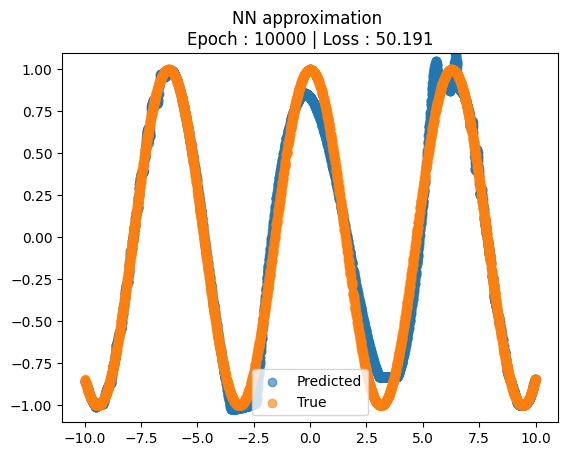

<Figure size 640x480 with 0 Axes>

In [70]:
N = 20
fcnn_approx = FCNN_approx()
fcnn_approx.initialize(N = N, func = "cosine")
y_pred, _ = fcnn_approx.train([N,2*N,N,1], initial_lr=0.01, decay_rate = 0.999, decay_steps = 100, epochs = 10000)